# Visualizing Sample Color Histograms
In notebook 6 of this project, I collected a bunch of sample images of different classes of objects (roofs, water, etc.) and plotted their color histograms. In this notebook, I'll try to calculate color histograms for each of my samples and then use dimensionality reduction to visualize the distribution.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import os
import glob
import cv2
from color_histograms import *
import IPython.display

%matplotlib inline

## Creating Pandas data structures
The first thing that we need to do is figure out how to store our data in Pandas data structures so that we can save them to spreadsheets for later use.

In [3]:
# Create data frame for image data
imageData = pd.DataFrame(columns=['class', 'imageID', 'filename',\
                                  'width', 'height', 'hist1', 'hist2',\
                                  'hist3', 'hist4', 'hist5', 'hist6',\
                                  'hist7', 'hist8', 'hist9', 'hist10',\
                                  'hist11', 'hist12', 'hist13', 'hist14',\
                                  'hist15', 'hist16', 'hist17', 'hist18',\
                                  'hist19', 'hist20', 'hist21', 'hist22',\
                                  'hist23', 'hist24', 'hist25', 'hist26',\
                                  'hist27', 'hist28', 'hist29', 'hist30',\
                                  'hist31', 'hist32', 'hist33', 'hist34',\
                                  'hist35', 'hist36', 'hist37', 'hist38',\
                                  'hist39', 'hist40', 'hist41', 'hist42',\
                                  'hist43', 'hist44', 'hist45', 'hist46',\
                                  'hist47', 'hist48'])

In [3]:
# Directories containing samples
imageDir = '../images/'
samplesDir = imageDir + 'samples/'
roofsDir = samplesDir + 'roofs/'
waterDir = samplesDir + 'water/'
vegDir = samplesDir + 'vegetation/'

Let's start with the **roof** class:

In [4]:
# Adding roof samples
className = 'roof'

# Iterate through images in directory and add image data to DataFrame
count = 0
for imagePath in glob.iglob(roofsDir + '*.png'):
    count += 1
    #print 'Processing image {}'.format(count)
    # Get image basename with extension
    imageFn = os.path.basename(imagePath)
    # Get image ID
    imageID = imageFn[:-4]
    # Read in image and get dimensions
    image = cv2.imread(imagePath)
    h, w = image.shape[:2]
    # Calculate color histogram
    hist = calc_color_hist(image, bins=16)
    hist = np.transpose(hist)
    # Create temporary histogram DataFrame
    histdf = pd.DataFrame(hist)
    colNames = list(histdf.columns.values)
    tempNames = [str(i+1) for i in colNames]
    newNames = ['hist' + i for i in tempNames]
    histdf.columns = newNames
    # Add to DataFrame
    img_data = pd.DataFrame({'class': [className], 'imageID': [imageID],\
                             'filename': [imageFn], 'width': [w],\
                             'height': [h]})
    # Add histogram DataFrame
    img_data = pd.concat([img_data, histdf], axis=1)
    # Adds new image data to DataFrame and continues indexing
    imageData = imageData.append(img_data, ignore_index=True)
print 'Processed {} images in total'.format(count)

Processed 70 images in total


In [5]:
# Drop any rows with duplicated information
# Can't use imageID to drop duplicates because imageID's are returned
# as ints when loaded from csv
imageData.drop_duplicates(['class', 'filename'], inplace=True)
# Reorganize columns
imageData = imageData[['class', 'imageID', 'filename',\
                       'width', 'height', 'hist1', 'hist2',\
                       'hist3', 'hist4', 'hist5', 'hist6',\
                       'hist7', 'hist8', 'hist9', 'hist10',\
                       'hist11', 'hist12', 'hist13', 'hist14',\
                       'hist15', 'hist16', 'hist17', 'hist18',\
                       'hist19', 'hist20', 'hist21', 'hist22',\
                       'hist23', 'hist24', 'hist25', 'hist26',\
                       'hist27', 'hist28', 'hist29', 'hist30',\
                       'hist31', 'hist32', 'hist33', 'hist34',\
                       'hist35', 'hist36', 'hist37', 'hist38',\
                       'hist39', 'hist40', 'hist41', 'hist42',\
                       'hist43', 'hist44', 'hist45', 'hist46',\
                       'hist47', 'hist48']]

In [6]:
# Writing image data to csv
dataDir = '../data/'
imageDataFn = dataDir + 'imageData.csv'
imageData.to_csv(imageDataFn)

Now that we've saved the roof samples data to a spreadsheet, we want to be able to load the data from the spreadsheet and add data for the vegetation samples and the water samples.

In [7]:
# Loading image data from csv
imageData = pd.read_csv(imageDataFn)
# Need to convert imageIDs to strings (some get converted to ints)
imageData.imageID = imageData.imageID.astype(str)
# Drop first column
imageData.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# Adding water samples
className = 'water'

# Iterate through images in directory and add image data to DataFrame
count = 0
for imagePath in glob.iglob(waterDir + '*.png'):
    count += 1
    #print 'Processing image {}'.format(count)
    # Get image basename with extension
    imageFn = os.path.basename(imagePath)
    # Get image ID
    imageID = imageFn[:-4]
    # Read in image and get dimensions
    image = cv2.imread(imagePath)
    h, w = image.shape[:2]
    # Calculate color histogram
    hist = calc_color_hist(image, bins=16)
    hist = np.transpose(hist)
    # Create temporary histogram DataFrame
    histdf = pd.DataFrame(hist)
    colNames = list(histdf.columns.values)
    tempNames = [str(i+1) for i in colNames]
    newNames = ['hist' + i for i in tempNames]
    histdf.columns = newNames
    # Add to DataFrame
    img_data = pd.DataFrame({'class': [className], 'imageID': [imageID],\
                             'filename': [imageFn], 'width': [w],\
                             'height': [h]})
    # Add histogram DataFrame
    img_data = pd.concat([img_data, histdf], axis=1)
    # Continues indexing
    imageData = imageData.append(img_data, ignore_index=True)
print 'Processed {} images in total'.format(count)

Processed 70 images in total


In [9]:
# New class of samples
className = 'vegetation'

# Iterate through images in directory and add image data to DataFrame
count = 0
for imagePath in glob.iglob(vegDir + '*.png'):
    count += 1
    #print 'Processing image {}'.format(count)
    # Get image basename with extension
    imageFn = os.path.basename(imagePath)
    # Get image ID
    imageID = imageFn[:-4]
    # Read in image and get dimensions
    image = cv2.imread(imagePath)
    h, w = image.shape[:2]
    # Calculate color histogram
    hist = calc_color_hist(image, bins=16)
    hist = np.transpose(hist)
    # Create temporary histogram DataFrame
    histdf = pd.DataFrame(hist)
    colNames = list(histdf.columns.values)
    tempNames = [str(i+1) for i in colNames]
    newNames = ['hist' + i for i in tempNames]
    histdf.columns = newNames
    # Add to DataFrame
    img_data = pd.DataFrame({'class': [className], 'imageID': [imageID],\
                             'filename': [imageFn], 'width': [w],\
                             'height': [h]})
    # Add histogram DataFrame
    img_data = pd.concat([img_data, histdf], axis=1)
    # Continues indexing
    imageData = imageData.append(img_data, ignore_index=True)
print 'Processed {} images in total'.format(count)

Processed 70 images in total


In [10]:
# Drop any rows with duplicated information
imageData.drop_duplicates(cols=['class', 'imageID'], inplace=True)
# Reorganize columns
imageData = imageData[['class', 'imageID', 'filename',\
                       'width', 'height', 'hist1', 'hist2',\
                       'hist3', 'hist4', 'hist5', 'hist6',\
                       'hist7', 'hist8', 'hist9', 'hist10',\
                       'hist11', 'hist12', 'hist13', 'hist14',\
                       'hist15', 'hist16', 'hist17', 'hist18',\
                       'hist19', 'hist20', 'hist21', 'hist22',\
                       'hist23', 'hist24', 'hist25', 'hist26',\
                       'hist27', 'hist28', 'hist29', 'hist30',\
                       'hist31', 'hist32', 'hist33', 'hist34',\
                       'hist35', 'hist36', 'hist37', 'hist38',\
                       'hist39', 'hist40', 'hist41', 'hist42',\
                       'hist43', 'hist44', 'hist45', 'hist46',\
                       'hist47', 'hist48']]
# Reset index in case duplicate rows were dropped
imageData.reset_index(drop=True);

In [11]:
# Writing image data to csv
dataDir = '../data/'
imageDataFn = dataDir + 'imageData.csv'
imageData.to_csv(imageDataFn)
print 'Wrote data for {} images to csv.'.format(imageData.shape[0])

Wrote data for 210 images to csv.


Since we'll probably be loading and writing image data later on, let's write a function that can take in a target directory and target csv file and then add image data for all images in the target directory to the existing csv.

In [12]:
def append_image_data(class_name, image_dir, csv_in, csv_out=None):
    """
    This function looks in the specified image directory and adds image
    data for all images within the directory to the database loaded from
    the input csv file, then writes the output database to the output
    csv.
    :param class_name: Class of images contained in directory
    :param image_dir: Directory containing images
    :param csv_in: Path to the input csv
    :param csv_out: Path of output csv
    """
    # If no output csv specified, write to input csv
    if csv_out == None:
        csv_out = csv_in
    # Loading image data from csv
    imageData = pd.read_csv(csv_in)
    # Need to convert imageIDs to strings (some get converted to ints)
    imageData.imageID = imageData.imageID.astype(str)
    # Drop first column
    imageData.drop('Unnamed: 0', axis=1, inplace=True)
    # Iterate through images in directory and add image data to DataFrame
    count = 0
    for imagePath in glob.iglob(image_dir + '*.png'):
        count += 1
        #print 'Processing image {}'.format(count)
        # Get image basename with extension
        imageFn = os.path.basename(imagePath)
        # Get image ID
        imageID = imageFn[:-4]
        # Read in image and get dimensions
        image = cv2.imread(imagePath)
        h, w = image.shape[:2]
        # Calculate color histogram
        hist = calc_color_hist(image, bins=16)
        hist = np.transpose(hist)
        # Create temporary histogram DataFrame
        histdf = pd.DataFrame(hist)
        colNames = list(histdf.columns.values)
        tempNames = [str(i+1) for i in colNames]
        newNames = ['hist' + i for i in tempNames]
        histdf.columns = newNames
        # Add to DataFrame
        img_data = pd.DataFrame({'class': [class_name], 'imageID': [imageID],\
                                 'filename': [imageFn], 'width': [w],\
                                 'height': [h]})
        # Add histogram DataFrame
        img_data = pd.concat([img_data, histdf], axis=1)
        # Continues indexing
        imageData = imageData.append(img_data, ignore_index=True)
    print 'Processed {} images in total'.format(count)
    # Drop any rows with duplicated information
    imageData.drop_duplicates(cols=['class', 'imageID'], inplace=True)
    # Reorganize columns
    imageData = imageData[['class', 'imageID', 'filename',\
                           'width', 'height', 'hist1', 'hist2',\
                           'hist3', 'hist4', 'hist5', 'hist6',\
                           'hist7', 'hist8', 'hist9', 'hist10',\
                           'hist11', 'hist12', 'hist13', 'hist14',\
                           'hist15', 'hist16', 'hist17', 'hist18',\
                           'hist19', 'hist20', 'hist21', 'hist22',\
                           'hist23', 'hist24', 'hist25', 'hist26',\
                           'hist27', 'hist28', 'hist29', 'hist30',\
                           'hist31', 'hist32', 'hist33', 'hist34',\
                           'hist35', 'hist36', 'hist37', 'hist38',\
                           'hist39', 'hist40', 'hist41', 'hist42',\
                           'hist43', 'hist44', 'hist45', 'hist46',\
                           'hist47', 'hist48']]
    # Reset index in case duplicate rows were dropped
    imageData.reset_index(drop=True)
    # Writing image data to output csv
    imageData.to_csv(csv_out)
    print 'Wrote data for {} images to csv.'.format(imageData.shape[0])

### Load image data
The next step is to read back the data into Numpy arrays so that I can use `sklearn` tools to visualize the data in two dimensions.

In [13]:
# Loading image data from csv
imageData = pd.read_csv(imageDataFn)
# Need to convert imageIDs to strings (some get converted to ints)
imageData.imageID = imageData.imageID.astype(str)
# Drop first column
imageData.drop('Unnamed: 0', axis=1, inplace=True)

#### Getting data labels
We need to get the labels for the training data and also encode them with integer values (instead of 'roof', 'water', etc.).

In [14]:
from sklearn import preprocessing

In [15]:
# Get class labels
labels = imageData.as_matrix(columns=['class'])
# Making 2D array into 1D array
labels = labels.flatten()
# Encode labels with value between 0 and n_classes-1
le = preprocessing.LabelEncoder()
# roof = 0, water = 2, vegetation = 1
le.fit(labels)
# print le.classes_ # displays the set of classes
labels = le.transform(labels)

print 'Got class labels for {} training data points.'.format\
      (labels.shape[0])

Got class labels for 210 training data points.


#### Getting color histogram feature vectors
Next we need to get the color histogram for each training example.

In [16]:
# Get color histograms
bins = ['hist' + str(i+1) for i in range(48)]
hists = imageData.as_matrix(columns=bins)

print 'Got feature vector for {} training data points.'.format\
      (hists.shape[0])

Got feature vector for 210 training data points.


As above, we will definitely be needing to load image data from csv for `sklearn` processing, so let's make a function that takes the image data csv file and returns Numpy arrays containing the color histogram feature vectors and the image class labels.

In [17]:
def import_image_data(csv_in):
    """
    This function reads image data from a csv file and returns Numpy
    arrays containing the image features and the image labels so that
    the data is ready for use. It also returns a label encoder so that
    we can go back and forth between class string labels and integer
    encodings.
    :param csv_in: Path of csv file containing image data
    :returns: Image feature vectors, image labels, and label encoder
    """
    # Loading image data from csv
    imageData = pd.read_csv(csv_in)
    # Need to convert imageIDs to strings (some get converted to ints)
    imageData.imageID = imageData.imageID.astype(str)
    # Drop first column
    imageData.drop('Unnamed: 0', axis=1, inplace=True)
    # Get class labels
    labels = imageData.as_matrix(columns=['class'])
    # Making 2D array into 1D array
    labels = labels.flatten()
    # Encode labels with value between 0 and n_classes-1
    le = preprocessing.LabelEncoder()
    # roof = 0, water = 2, vegetation = 1
    le.fit(labels)
    print le.classes_ # displays the set of classes
    labels = le.transform(labels)
    print 'Got class labels for {} training data points.'.format\
          (labels.shape[0])
    # Get color histograms
    bins = ['hist' + str(i+1) for i in range(48)]
    hists = imageData.as_matrix(columns=bins)
    print 'Got feature vector for {} training data points.'.format\
          (hists.shape[0])
    return (hists, labels, le)

## Dimensionality reduction
Now we are finally ready to try to visualize our high-dimensional dataset. We'll use several different dimensionality reduction techniques to try to find a good visualization in two dimensions. Hopefully we will be able to see some clear separations between our different classes--if we do, then we can start to think about how to classify future test set data.

### PCA

In [18]:
from sklearn import decomposition

In [19]:
# Calculate the 1st 2 PCA components
pca = decomposition.PCA(n_components=2)
pca.fit(hists)
X = pca.transform(hists)

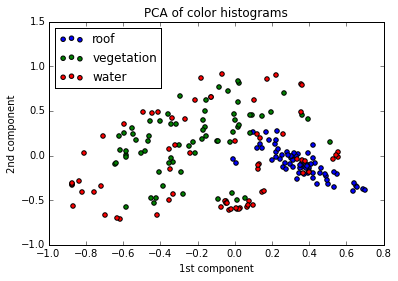

In [20]:
# Plot PCA decomposition with 3 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X[indices,0], X[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper left')
plt.title('PCA of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

This already doesn't look very good... but let's add in another category of images just to see what happens. Neither vegetation nor water images look very similar (visually) to roofs, so I want to see how dimensionality reduction works with a more similar category. Let's add in "dirt" for now, and maybe we can add roads later.

In [21]:
# Using function for adding image data
dirtDir = samplesDir + 'dirt/'
append_image_data('dirt', dirtDir, imageDataFn)

Processed 70 images in total
Wrote data for 280 images to csv.


In [22]:
# Using function for importing data from csv
hists, labels, le = import_image_data(imageDataFn)

['dirt' 'roof' 'vegetation' 'water']
Got class labels for 280 training data points.
Got feature vector for 280 training data points.


In [23]:
# Calculate the 1st 2 PCA components
pca = decomposition.PCA(n_components=2)
pca.fit(hists)
X_pca = pca.transform(hists)

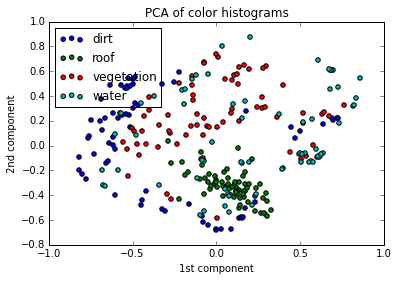

In [24]:
# Plot PCA decomposition with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_pca[indices,0], X_pca[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper left')
plt.title('PCA of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

Overall, the PCA decomposition doesn't look that great, but at least the roofs seems to be clustered together so that seems promising.

Let's see what happens when we use LDA to identify the differences between classes, as PCA was an unsupervised algorithm.

### LDA

In [25]:
from sklearn import lda

In [26]:
# Projection onto the first 2 linear discriminant components
hists2 = hists.copy()
hists.flat[::hists.shape[1] + 1] += 0.01 # Make X invertible
X_lda = lda.LDA(n_components=2).fit_transform(hists2, labels)

/afs/cs.stanford.edu/u/nealjean/.local/lib/python2.7/site-packages/sklearn/lda.py:161: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


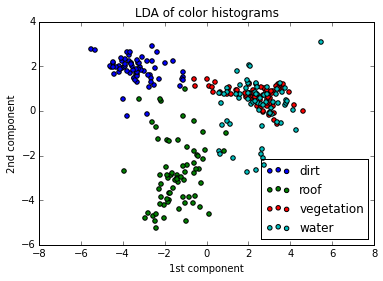

In [27]:
# Plot LDA decomposition with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_lda[indices,0], X_lda[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='lower right')
plt.title('LDA of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

LDA seems to work much better than PCA. Let's also try some of the other dimensionality reduction techniques that we learned in the tutorial.

### Isomap

In [28]:
from sklearn import manifold

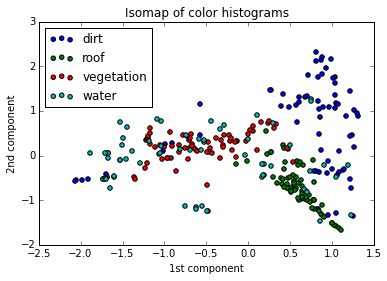

In [32]:
n_neighbors = 10
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(hists)
# Plot Isomap with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_iso[indices,0], X_iso[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper left')
plt.title('Isomap of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

### 

### Locally-linear embedding (LLE)

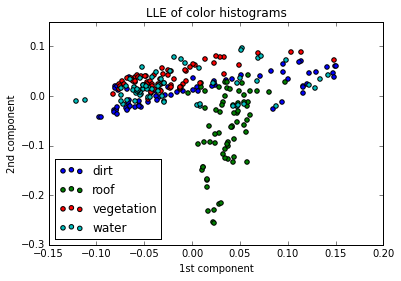

In [42]:
n_neighbors = 50
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='standard')
X_lle = clf.fit_transform(hists)
# Plot LLE with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_lle[indices,0], X_lle[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='lower left')
plt.title('LLE of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

### Modified LLE

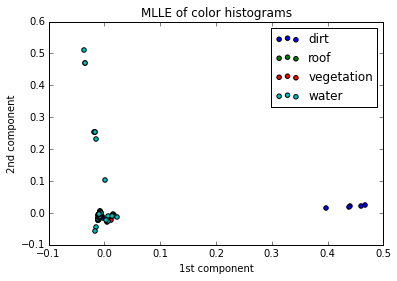

In [59]:
n_neighbors = 20
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='modified')
X_mlle = clf.fit_transform(hists)
# Plot MLLE with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_mlle[indices,0], X_mlle[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper right')
plt.title('MLLE of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

This one sucks.

### Hessian Eigenmapping or Hessian-based LLE (HLLE)

In [60]:
n_neighbors = 50
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='hessian')
X_hlle = clf.fit_transform(hists)
# Plot HLLE with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_hlle[indices,0], X_hlle[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper right')
plt.title('HLLE of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

ValueError: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that method='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.  method='dense' is recommended. See online documentation for more information.

This one doesn't seem to work for whatever reason.

### Spectral embedding (Laplacian Eigenmaps)

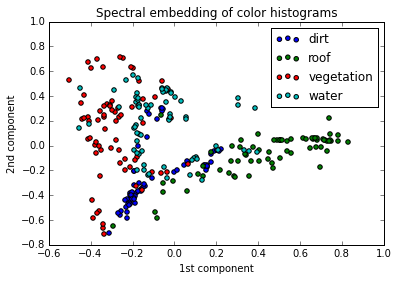

In [62]:
clf = manifold.SpectralEmbedding(n_components=2, random_state=0,\
                                eigen_solver='arpack')
X_spectral = clf.fit_transform(hists)
# Plot spectral embedding with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_spectral[indices,0], X_spectral[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper right')
plt.title('Spectral embedding of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

### Local Tangent Space Alignment (LTSA

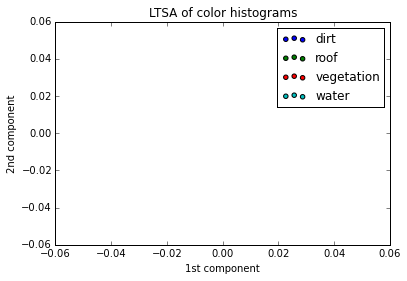

In [65]:
n_neighbors = 10
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,\
                                     method='ltsa')
X_ltsa = clf.fit_transform(hists)
# Plot LTSA with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_ltsa[indices,0], X_ltsa[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper right')
plt.title('LTSA of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

Also doesn't work for mysterious reasons...

### Multi-dimensional scaling (MDS)

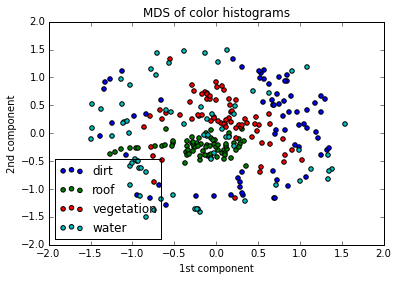

In [66]:
clf = manifold.MDS(n_components=2, metric=True, n_init=1, max_iter=100)
X_mds = clf.fit_transform(hists)
# Plot MDS with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_mds[indices,0], X_mds[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='lower left')
plt.title('MDS of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

### Random trees embedding

In [69]:
from sklearn import ensemble

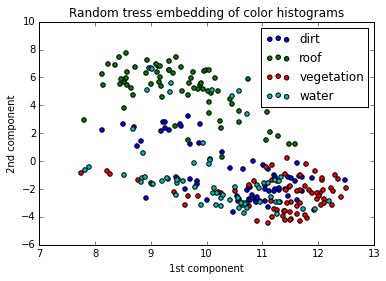

In [70]:
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,\
                                      max_depth=5)
X_transformed = hasher.fit_transform(hists)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
# Plot random trees embedding with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_reduced[indices,0], X_reduced[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper right')
plt.title('Random tress embedding of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

### t-distributed Stochastic Neighbor Embedding (t-SNE)

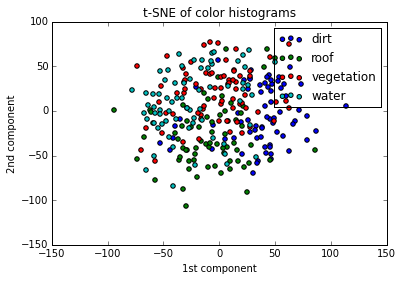

In [75]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(hists)
# Plot t-SNE with 4 classes 
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i in range(np.unique(labels).size):
    indices = np.where(labels==i)
    plt.scatter(X_tsne[indices,0], X_tsne[indices,1], c=colors[i])
plt.legend([le.inverse_transform(i) for i in\
            range(np.unique(labels).size)], loc='upper right')
plt.title('t-SNE of color histograms')
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

From these plots of different low-dimensional representations of our data, it seems like both PCA and LDA, despite being simpler procedures, seem to work the best at separating out images of roofs. It seems like we might be able to do some kind of k-nearest neighbors classification on test images and do relatively well.

## Classification
Let's try out some simple classifiers on our data and see if we can classify our image samples just using the color histograms. If we can't do this, then it is unlikely that we'll be able to find houses in our actual satellite images.

### k-Nearest Neighbors

In [76]:
from sklearn import neighbors

In [150]:
# Mix up the data
perm = np.random.permutation(labels.size)
hists = hists[perm]
labels = labels[perm]

In [172]:
# Create and fit a nearest-neighbor classifier
n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
# Train on first 200 out of 280 observations
knn.fit(hists[:200], labels[:200])
# Test on observations 201-280
accuracy = knn.score(hists[200:], labels[200:])
print 'Overall classification accuracy: {}'.format(accuracy)

Overall classification accuracy: 0.8125


In [173]:
# Predict labels for test set
label_predictions = knn.predict(hists[200:])
label_probs = knn.predict_proba(hists[200:])
correct = label_predictions==labels[200:]

In [174]:
# Comparing predictions to actual labels for test set
yhat = le.inverse_transform(label_predictions)
y = le.inverse_transform(labels[200:])
comp = np.concatenate((np.array([y]).transpose(),\
                       np.array([yhat]).transpose(),\
                       np.array([correct]).transpose(),\
                       label_probs), axis=1)
comp = pd.DataFrame(comp)
comp.columns = ['label', 'predicted label', 'correct', 'dirt', 'roof',\
                'vegetation', 'water']

In [175]:
# Analyzing results of classification
is_roof = comp['label'] == 'roof'
roof_labels = comp[is_roof]['correct'].value_counts()
true_positive = roof_labels[True]
false_negative = roof_labels[False]
not_roof = comp['label'] != 'roof'
nonroof_labels = comp[not_roof]['predicted label'].value_counts()
false_positive = nonroof_labels['roof']
true_negative = nonroof_labels.sum() - false_positive
# Print correct and incorrect prediction counts
print 'Out of {} roofs:'.format(true_positive + false_negative)
print '    - {} classified correctly'.format(true_positive)
print '    - {} classified incorrectly'.format(false_negative)
print 'Out of {} nonroofs:'.format(false_positive + true_negative)
print '    - {} classified correctly as nonroofs'.format(true_negative)
print '    - {} classified incorrectly as roofs'.format(false_positive)

Out of 24 roofs:
    - 19 classified correctly
    - 5 classified incorrectly
Out of 56 nonroofs:
    - 53 classified correctly as nonroofs
    - 3 classified incorrectly as roofs


### Support vector machines (SVMs)

#### Linear SVMs

In [135]:
from sklearn import svm

In [136]:
svc = svm.SVC(kernel='linear')
# Train on first 200 out of 280 observations
svc.fit(hists[:200], labels[:200])
# Test on observations 201-280
svc.score(hists[200:], labels[200:])

0.78749999999999998

In [137]:
# Predict labels for test set
label_predictions = svc.predict(hists[200:])
correct = label_predictions==labels[200:]

In [139]:
# Comparing predictions to actual labels for test set
yhat = le.inverse_transform(label_predictions)
y = le.inverse_transform(labels[200:])
comp = np.concatenate((np.array([y]).transpose(),\
                       np.array([yhat]).transpose(),\
                       np.array([correct]).transpose()), axis=1)
comp = pd.DataFrame(comp)
comp.columns = ['label', 'predicted label', 'correct']
# Analyzing results of classification
is_roof = comp['label'] == 'roof'
roof_labels = comp[is_roof]['correct'].value_counts()
true_positive = roof_labels[True]
false_negative = roof_labels[False]
not_roof = comp['label'] != 'roof'
nonroof_labels = comp[not_roof]['predicted label'].value_counts()
false_positive = nonroof_labels['roof']
true_negative = nonroof_labels.sum() - false_positive
# Print correct and incorrect prediction counts
print 'Out of {} roofs:'.format(true_positive + false_negative)
print '    - {} classified correctly'.format(true_positive)
print '    - {} classified incorrectly'.format(false_negative)
print 'Out of {} nonroofs:'.format(false_positive + true_negative)
print '    - {} classified correctly as nonroofs'.format(true_negative)
print '    - {} classified incorrectly as roofs'.format(false_positive)
print 'Classificaion accuracy: {}'.format()

Out of 22 roofs:
    - 19 classified correctly
    - 3 classified incorrectly
Out of 58 nonroofs:
    - 54 classified correctly as nonroofs
    - 4 classified incorrectly as roofs


#### Nonlinear SVMs (kernels)

In [147]:
# Polynomial kernel
svc1 = svm.SVC(kernel='poly', degree=3)
svc1.fit(hists[:200], labels[:200])
svc1.score(hists[200:], labels[200:])

0.20000000000000001

In [142]:
# Radial basis function (RBF) kernel
svc2 = svm.SVC(kernel='rbf')
svc2.fit(hists[:200], labels[:200])
svc2.score(hists[200:], labels[200:])

0.42499999999999999